In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# basic plot variales
pd.options.display.max_columns = 100
blue = '#3298D0'
plot_size = (14, 10)

## Load data

In [3]:
#load data
DATA_FILE = "Data/nba-players-stats/Seasons_Stats.csv"

def load_NBA_data(url):
    return pd.read_csv(url)

nba_data = load_NBA_data(DATA_FILE)

## Data cleaning
- Drop columns don't needed
- Delete NA and inf values
- Correct dtypes values

In [4]:
#Dataset info
print(nba_data.columns)
#24,691 entries

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
# Dates formatting
nba_data['Year'] =  pd.to_datetime(nba_data['Year'])
nba_data['year'] = nba_data['Year'].astype('int64')

In [6]:
nba_data = nba_data.fillna(0)

In [7]:
# New data types
nba_data['Pos'] = nba_data['Pos'].astype('category')
nba_data['Pos'] = nba_data['Pos'].astype('category')

#stats to int32
list_stats_int = ['ORB', 'DRB', 'TRB', 'AST', 
                  'STL', 'BLK', 'TOV', 'PF', 
                  'PTS', '3P', '3P%', 'G', 'Age', 
                  'PTS', 'MP', '3PA']
for ls in list_stats_int:
    nba_data[ls] = nba_data[ls].astype('int32')

In [8]:
# Delete colum ns
nba_data = nba_data.drop(columns = ['Year', 'blanl', 'blank2', 'Unnamed: 0'])

In [9]:
nba_data.sample(5)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
19303,Mike Wilks,PG,28,TOT,15,0.0,188,8.6,0.543,0.222,0.111,3.0,8.3,5.6,11.3,2.4,0.0,19.2,10.7,0.0,0.2,0.2,0.052,-2.6,-0.4,-2.9,0.0,17.0,36.0,0.472,3,8,0,14.0,28.0,0.500,0.514,4.0,4.0,1.000,5,14,19,14,9,0,9,13,41,2008
4880,Allen Murphy,SG,24,LAL,2,0.0,18,1.8,0.309,0.000,1.400,17.4,5.5,11.3,0.0,0.0,0.0,0.0,0.0,-0.1,0.0,-0.1,-0.229,-8.7,-8.3,-16.9,-0.1,1.0,5.0,0.200,0,0,0,1.0,5.0,0.200,0.200,3.0,7.0,0.429,3,1,4,0,0,0,0,5,5,1977
15607,Chris Crawford,PF,26,ATL,7,4.0,131,11.5,0.514,0.022,0.333,7.8,14.0,10.9,6.7,0.8,2.8,16.2,21.3,0.0,0.1,0.1,0.035,-3.7,-1.3,-5.0,-0.1,21.0,45.0,0.467,0,1,0,21.0,44.0,0.477,0.467,11.0,15.0,0.733,9,16,25,5,2,5,10,21,53,2002
21391,Stephen Jackson,SF,33,TOT,47,14.0,1212,10.7,0.485,0.400,0.268,2.0,13.1,7.6,14.6,2.3,0.8,17.8,21.3,-0.7,1.3,0.6,0.025,-1.7,0.1,-1.6,0.1,159.0,425.0,0.374,49,170,0,110.0,255.0,0.431,0.432,94.0,114.0,0.825,22,141,163,118,54,13,103,99,461,2012
21418,Joe Johnson,SG,30,ATL,60,60.0,2127,18.4,0.557,0.346,0.200,2.9,9.2,6.1,19.7,1.2,0.5,10.3,24.9,4.4,2.1,6.4,0.145,3.4,-1.4,2.1,2.2,423.0,931.0,0.454,125,322,0,298.0,609.0,0.489,0.521,158.0,186.0,0.849,53,168,221,232,48,13,116,75,1129,2012


## Filter data from 1980

In [10]:
#select only data since 1980
filtered_data = nba_data[nba_data.year > 1979 ]
filtered_data.sort_values(by='year', ascending = True)

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
5727,Kareem Abdul-Jabbar*,C,32,LAL,82,0.0,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8,835.0,1383.0,0.604,0,1,0,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190,696,886,371,81,280,297,216,2034,1980
5970,Eric Money,SG,24,DET,55,0.0,1467,11.7,0.539,0.000,0.204,2.0,5.0,3.5,21.8,1.6,0.4,20.5,18.3,0.6,0.2,0.8,0.026,-1.6,-2.7,-4.3,-0.9,259.0,510.0,0.508,0,0,0,259.0,510.0,0.508,0.508,81.0,104.0,0.779,28,69,97,238,53,10,143,135,599,1980
5969,Eric Money,PG,24,PHI,6,0.0,82,4.4,0.407,0.000,0.056,4.1,4.9,4.5,27.2,0.0,0.7,24.5,23.8,-0.2,0.1,-0.2,-0.094,-6.8,-3.9,-10.7,-0.2,14.0,36.0,0.389,0,0,0,14.0,36.0,0.389,0.389,2.0,2.0,1.000,3,4,7,16,0,1,12,11,30,1980
5968,Eric Money,SG-PG,24,TOT,61,0.0,1549,11.4,0.531,0.000,0.194,2.1,5.0,3.5,22.1,1.5,0.4,20.7,18.6,0.4,0.3,0.6,0.020,-1.8,-2.8,-4.7,-1.0,273.0,546.0,0.500,0,0,0,273.0,546.0,0.500,0.500,83.0,106.0,0.783,31,73,104,254,53,11,155,146,629,1980
5967,Sidney Moncrief,SG,22,MIL,77,0.0,1557,15.9,0.564,0.002,0.647,11.1,12.5,11.8,10.7,2.2,0.6,16.8,17.8,2.8,2.0,4.9,0.150,0.9,0.7,1.7,1.4,211.0,451.0,0.468,0,1,0,211.0,450.0,0.469,0.468,232.0,292.0,0.795,154,184,338,133,72,16,117,106,654,1980
5966,Paul Mokeski,C,23,HOU,12,0.0,113,4.4,0.392,0.000,0.273,13.3,15.1,14.2,2.2,0.4,3.0,21.3,16.4,-0.2,0.1,-0.1,-0.041,-6.1,-1.6,-7.7,-0.2,11.0,33.0,0.333,0,0,0,11.0,33.0,0.333,0.333,7.0,9.0,0.778,14,15,29,2,1,6,10,24,29,1980
5965,Steve Mix,SF,32,PHI,81,0.0,1543,19.5,0.577,0.014,0.354,8.3,11.5,10.0,14.8,2.0,0.3,14.0,24.5,3.4,2.1,5.5,0.172,1.9,-0.8,1.1,1.2,363.0,703.0,0.516,4,10,0,359.0,693.0,0.518,0.519,207.0,249.0,0.831,114,176,290,149,67,9,132,114,937,1980
5964,Mike Mitchell,SF,24,CLE,82,0.0,2802,19.1,0.557,0.004,0.231,7.4,15.2,11.1,4.9,1.1,1.5,9.5,24.7,5.9,2.4,8.3,0.142,1.7,-1.4,0.3,1.6,775.0,1482.0,0.523,0,6,0,775.0,1476.0,0.525,0.523,270.0,343.0,0.787,206,385,591,93,70,77,172,259,1820,1980
5963,Dave Meyers,PF,26,MIL,79,0.0,2204,13.3,0.509,0.006,0.296,7.1,14.7,11.0,13.6,1.5,1.0,16.2,20.2,1.0,2.8,3.9,0.084,-0.8,0.7,-0.1,1.0,399.0,830.0,0.481,1,5,0,398.0,825.0,0.482,0.481,156.0,246.0,0.634,140,308,448,225,72,40,182,218,955,1980
5971,Earl Monroe*,SG,35,NYK,51,0.0,633,15.3,0.497,0.000,0.182,2.7,3.5,3.1,15.0,1.5,0.3,6.9,24.8,1.0,0.1,1.1,0.081,-0.8,-4.7,-5.5,-0.6,161.0,352.0,0.457,0,0,0,161.0,352.0,0.457,0.457,56.0,64.0,0.875,16,20,36,67,21,3,28,46,378,1980


# ML model

In [11]:
from sklearn.cluster import KMeans

## Preparing dataset

In [12]:
df = filtered_data.groupby(['Player']).agg({'3PA':'sum', 
                                            '3P':'sum', 
                                            'year':'count', 
                                            'PTS':'sum',
                                            'MP':'sum',
                                            'TRB':'sum',
                                            'AST':'sum',
                                            'BLK':'sum'
                                           })

In [13]:
df.sample(10)

,3PA,3P,year,PTS,MP,TRB,AST,BLK
Player,,,,,,,,
Edmund Lawrence,0,0,1,12,19,4,1,0
Alan Anderson,963,331,8,2421,6793,714,371,31
Tony Delk,1794,601,16,6517,15215,1779,1361,100
Ben Poquette,63,13,10,4324,14404,3351,830,708
Greg Ballard,275,93,9,8942,19585,4142,1555,213
Roy Tarpley,34,6,6,3533,7476,2803,292,329
Kevin Gamble,748,272,12,6540,15833,1570,1400,184
Ed Stokes,0,0,1,3,17,4,1,2
Willie Green,1494,517,12,6059,14783,1303,1018,108


In [14]:
# Create two new columns
df['3PA_per_season'] = round(df['3PA'] / df['year'], 2)
df['3P%_career'] = (round(df['3PA'] / df['3P'], 2)) * 10

#sort values by total 3P
df = df.sort_values(by='3P', ascending=False)

# Check dataset
print(df.count())
df.sample(10)

3PA               2835
3P                2835
year              2835
PTS               2835
MP                2835
TRB               2835
AST               2835
BLK               2835
3PA_per_season    2835
3P%_career        2457
dtype: int64


,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career
Player,,,,,,,,,,
Matt Barnes,3209,1072,18,8291,24375,4792,1912,477,178.28,29.900000
Herb Williams,93,9,22,12859,31525,7192,2007,1772,4.23,103.300000
David Cooke,0,0,1,9,38,10,1,0,0.00,NaN
Anthony Brown,124,34,4,201,917,136,35,7,31.00,36.500000
James Anderson,671,217,7,1571,4721,632,333,60,95.86,30.900000
Joakim Noah,15,0,10,5557,17863,5789,1807,840,1.50,inf
Alex Stepheson,0,0,3,44,146,56,4,10,0.00,NaN
Tim Legler,668,282,12,2471,5888,540,448,47,55.67,23.700000
Larry Micheaux,6,0,4,541,1462,399,79,53,1.50,inf


In [15]:
# Replace inf values with nan
df['3P%_career'] = df['3P%_career'].replace([np.inf, -np.inf], np.nan)

# Drop Na values
df = df.dropna()

In [16]:
print(df.count())
df.sample(20)

3PA               2007
3P                2007
year              2007
PTS               2007
MP                2007
TRB               2007
AST               2007
BLK               2007
3PA_per_season    2007
3P%_career        2007
dtype: int64


,3PA,3P,year,PTS,MP,TRB,AST,BLK,3PA_per_season,3P%_career
Player,,,,,,,,,,
Alan Henderson,26,5,12,5094,13780,3249,397,297,2.17,52.0
Jameer Nelson,3268,1201,16,10216,24933,2637,4582,70,204.25,27.2
Michael Doleac,8,1,12,3207,9818,2220,387,245,0.67,80.0
Chris Ford,336,126,3,1979,6429,452,652,60,112.00,26.7
Luke Harangody,153,37,4,446,1511,339,66,37,38.25,41.4
Greg Dreiling,9,3,10,1014,4241,1018,186,137,0.90,30.0
Eric Snow,282,57,15,6000,24050,2222,4422,110,18.80,49.5
Gerald Madkins,32,12,3,80,420,26,65,1,10.67,26.7
Dwyane Wade,1502,431,14,21317,32352,4397,5173,800,107.29,34.8


# Kmeans classification

In [17]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

X = df[['3PA','3P','3PA_per_season','3P%_career', 'year']]

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# Create new group with values
df['group'] = clusters.predict(X)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, Ray Allen to Tyson Wheeler
Data columns (total 11 columns):
3PA               2007 non-null int32
3P                2007 non-null int32
year              2007 non-null int64
PTS               2007 non-null int32
MP                2007 non-null int32
TRB               2007 non-null int32
AST               2007 non-null int32
BLK               2007 non-null int32
3PA_per_season    2007 non-null float64
3P%_career        2007 non-null float64
group             2007 non-null int32
dtypes: float64(2), int32(8), int64(1)
memory usage: 125.4+ KB


In [20]:
df.group = df.group.astype('category', ordered = False, categories = range(0, n))

/Users/cmserna/miniconda3/envs/nba/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [21]:
df.group.unique()

[3, 1, 4, 2, 5, 0]
Categories (6, int64): [3, 1, 4, 2, 5, 0]

In [22]:
group_0 = df[(df['group'] == 0)]
group_1 = df[(df['group'] == 1)]
group_2 = df[(df['group'] == 2)]
group_3 = df[(df['group'] == 3)]
group_4 = df[(df['group'] == 4)]
group_5 = df[(df['group'] == 5)]

In [23]:
h = 25

print('\n------------')
print('Group 0: {} players'.format(group_0.describe()))
print(group_0.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 1: {} players'.format(group_1.describe()))
print(group_1.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 2: {} players'.format(group_2.describe()))
print(group_2.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 3: {} players'.format(group_3.describe()))
print(group_3.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 4: {} players'.format(group_4.describe()))
print(group_4.sort_values(by='3P', ascending=False).head(h))

print('\n------------')
print('Group 5: {} players'.format(group_5.describe()))
print(group_5.sort_values(by='3P', ascending=False).head(h))


------------
Group 0:                3PA           3P         year           PTS            MP  \
count  1283.000000  1283.000000  1283.000000   1283.000000   1283.000000   
mean     72.628215    19.946999     5.932190   2396.402182   5911.304754   
std      78.511750    24.599703     4.928277   3884.211378   8184.255221   
min       1.000000     1.000000     1.000000      3.000000      3.000000   
25%      14.000000     2.000000     2.000000    184.000000    562.000000   
50%      37.000000     8.000000     4.000000    733.000000   2157.000000   
75%     110.000000    29.000000     9.000000   3112.500000   8346.000000   
max     321.000000   113.000000    27.000000  36928.000000  54852.000000   

                TRB          AST          BLK  3PA_per_season   3P%_career  
count   1283.000000  1283.000000  1283.000000     1283.000000  1283.000000  
mean    1259.738114   443.082619   169.190959       19.376274    51.279189  
std     2129.662146   710.418315   376.149512       29.044449

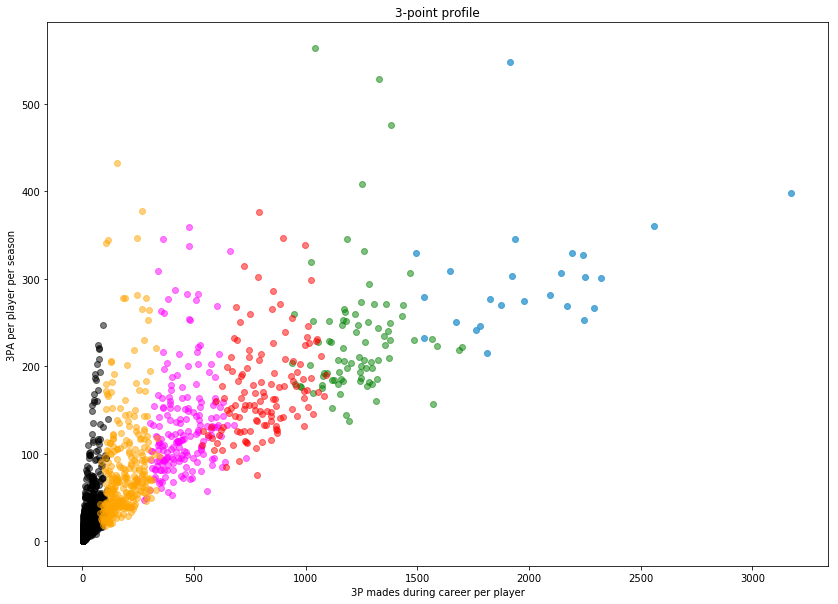

In [24]:
'''
Variables in the model:
3PA', '3P', 'year', '3PA_per_season', '3P%_career'
'''

plt.figure(figsize=plot_size)

a = '3P'
b = '3PA_per_season'
h = 0.5
h_top = 0.8

plt.scatter(group_0[a], group_0[b], c='black', alpha=h)
plt.scatter(group_1[a], group_1[b], c='green', alpha=h)
plt.scatter(group_2[a], group_2[b], c='magenta', alpha=h)
plt.scatter(group_3[a], group_3[b], c= blue, alpha=h_top)
plt.scatter(group_4[a], group_4[b], c='red', alpha=h)
plt.scatter(group_5[a], group_5[b], c='orange', alpha=h)

plt.title('3-point profile')
plt.xlabel('3P mades during career per player')
plt.ylabel('3PA per player per season')

plt.xscale('linear')
plt.yscale('linear')

plt.show()

In [26]:
# Exporting dataset 
df.to_csv(path_or_buf='data/RM-index.csv', sep=',')